In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
#Code for creating data frame of testing data
data = pd.read_csv('requests.csv')
data.columns = ['timestamp', 'userID', 'sessionID', 'expiring', 'URL']
print(data)

            timestamp      userID                              sessionID  \
0       1676373343936   user-1003   c85cbd00-d2fc-4cda-9f5c-66616847d851   
1       1676373344344   user-1005   a0038f81-b46a-4f26-a7ea-2791d53404fb   
2       1676373344456   user-1003   c85cbd00-d2fc-4cda-9f5c-66616847d851   
3       1676373344912     user-65   fd48a9f9-67f4-4185-9bcc-a76b7139401c   
4       1676373345020   user-1005   a0038f81-b46a-4f26-a7ea-2791d53404fb   
...               ...         ...                                    ...   
263206  1676444990852    user-629   2a43fe7f-d300-470d-9523-d362b70b37d3   
263207  1676444991104    user-629   2a43fe7f-d300-470d-9523-d362b70b37d3   
263208  1676444991342    user-629   2a43fe7f-d300-470d-9523-d362b70b37d3   
263209  1676444991375   user-1005   0e84ab80-bfa4-402b-9ae0-6397441e91d6   
263210  1676444992110   user-1005   0e84ab80-bfa4-402b-9ae0-6397441e91d6   

             expiring                            URL  
0       1676373495816           

In [30]:
users = list(data['userID'])
allUsers = data.set_index(['userID'])
print(allUsers)

                timestamp                              sessionID  \
userID                                                             
 user-1003  1676373343936   c85cbd00-d2fc-4cda-9f5c-66616847d851   
 user-1005  1676373344344   a0038f81-b46a-4f26-a7ea-2791d53404fb   
 user-1003  1676373344456   c85cbd00-d2fc-4cda-9f5c-66616847d851   
 user-65    1676373344912   fd48a9f9-67f4-4185-9bcc-a76b7139401c   
 user-1005  1676373345020   a0038f81-b46a-4f26-a7ea-2791d53404fb   
...                   ...                                    ...   
 user-629   1676444990852   2a43fe7f-d300-470d-9523-d362b70b37d3   
 user-629   1676444991104   2a43fe7f-d300-470d-9523-d362b70b37d3   
 user-629   1676444991342   2a43fe7f-d300-470d-9523-d362b70b37d3   
 user-1005  1676444991375   0e84ab80-bfa4-402b-9ae0-6397441e91d6   
 user-1005  1676444992110   0e84ab80-bfa4-402b-9ae0-6397441e91d6   

                 expiring                            URL  
userID                                                  

In [31]:
newDF = []

for name in users:
    l = []
    l.append(name)
    userInfo = allUsers.loc[name]
    userReq = list(userInfo['URL'])
    for req in userReq:
        l.append(req)
    newDF.append(l)


df = pd.DataFrame(data=newDF)

print(df)

KeyboardInterrupt: 

Following code just serves as a way to experiment using sequence of numbers. Could we use tfidf for vectorizing data?

In [94]:
#Function to create a sequence of numbers. Approx. 10% of the sequences will consist of duplicates of the same number
import random

def create_sequence(arr, randVal):
    if (randVal < 1):
        val = random.randint(1,9)
        for i in range (50):
            arr.append(val)
    else:    
        for i in range (0, 50):
            arr.append(random.randint(1,9))
    return arr    

In [95]:
#Function to give a sequence a score depending on number of consecutive duplicates
def sequence_evaluation(df):
    arr = []
    for i in range (0, df.shape[0]):
        data = df.iloc[i].to_list()
        score = 0
        lr = 0.1
        val = data[0]
        for j in range (1, len(data)):
            if (data[j] == val):
                score -= lr*data[j]
                if(lr < 1):
                    lr += 1.1*lr
            else:
                score += data[j]
                val = data[j]
        arr.append(score) 
    return arr     

In [96]:
#Function that calculates length of the longest subsequence of consecutive duplicates for each sequence
from itertools import groupby

def longestConsecutive(df):
    arr = []
    for i in range (0, df.shape[0]):
        longest_streak = len(max([list(group) for _, group in groupby(df.iloc[i].to_list())], key=len))
        arr.append(longest_streak)
    return arr

In [97]:
#Creation of the sequence data frame
sequence_matrix = []
for i in range (1000):
    randVal = random.randint(0,9)
    arr = []
    sequence_matrix.append(create_sequence(arr, randVal))

sequence_df = pd.DataFrame(sequence_matrix)

sequence_df['score'] = sequence_evaluation(sequence_df)
sequence_df['longestConsec'] = longestConsecutive(sequence_df.loc[:, sequence_df.columns != 'score'])
sequence_df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,score,longestConsec
0,5,8,2,2,7,3,5,7,9,2,...,7,6,4,6,6,5,5,6,164.23217,2
1,2,4,3,8,6,6,4,6,9,7,...,1,8,9,6,3,7,2,9,245.33400,2
2,6,4,8,9,8,6,9,7,2,3,...,1,3,2,5,3,2,5,4,222.99400,3
3,8,8,4,6,3,6,6,6,2,7,...,5,5,8,4,9,4,5,1,109.37439,3
4,1,1,4,2,4,4,1,8,3,1,...,6,4,9,3,6,1,5,7,137.27363,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7,6,7,6,8,1,5,7,9,9,...,6,8,3,2,4,4,8,1,195.62823,4
996,1,8,5,4,9,2,6,6,7,9,...,5,3,1,3,2,2,9,5,190.36118,2
997,7,1,2,6,1,2,6,8,8,5,...,5,3,2,9,5,2,5,6,161.79741,2
998,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,-178.38710,50


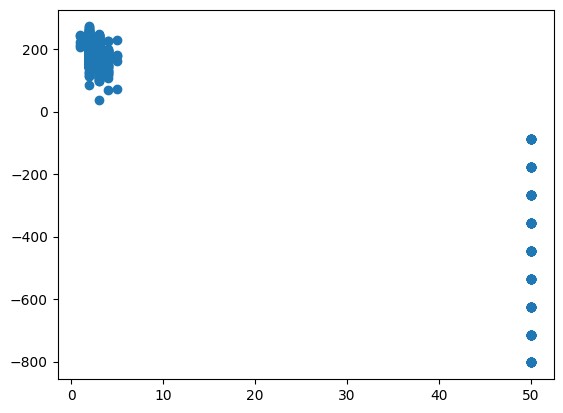

In [102]:
#A yanky scatter plot....
plt.scatter(sequence_df['longestConsec'], sequence_df['score'])